In [4]:
import pandas as pd
import numpy as np

# Load data with proper file path handling (use raw string or forward slashes)
df = pd.read_csv(r"D:\AMAL\project.csv", low_memory=False)

# 1. Initial Data Inspection
print("=== FIRST 5 ROWS ===")
print(df.head(5))
print("\n")

# 2. Data Types
print("=== DATA TYPES ===")
print(df.dtypes)
print("\n")

# 3. Dataset Shape
print("=== DATASET SHAPE ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n")

# 4. Missing Values
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing values
print("\n")

# 5. Descriptive Statistics (Numerical Columns Only)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if not numerical_cols.empty:
    print("=== DESCRIPTIVE STATISTICS ===")
    stats = df[numerical_cols].describe(percentiles=[.25, .5, .75])
    
    # Add additional metrics
    stats.loc['range'] = stats.loc['max'] - stats.loc['min']
    stats.loc['variance'] = df[numerical_cols].var()
    stats.loc['skewness'] = df[numerical_cols].skew()
    stats.loc['kurtosis'] = df[numerical_cols].kurtosis()
    
    print(stats)
    print("\n")
    
    # 6. Outlier Detection
    print("=== OUTLIER ANALYSIS ===")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"\nOutliers in {col} (IQR Method):")
            print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
            print(f"Found {len(outliers)} outliers:")
            print(outliers[[col]])
else:
    print("No numerical columns found for statistical analysis")

=== FIRST 5 ROWS ===
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Se


After Deletion (rows):
         index             Order ID        Date                        Status  \
49051    49051  408-4858463-2356347    05-31-22  Shipped - Delivered to Buyer   
49077    49077  402-7697834-2682766    05-31-22  Shipped - Delivered to Buyer   
49081    49081  402-7031777-0396341    05-31-22  Shipped - Delivered to Buyer   
49082    49082  408-1235521-4337163    05-31-22  Shipped - Delivered to Buyer   
49083    49083  403-3845187-4421165    05-31-22  Shipped - Delivered to Buyer   
...        ...                  ...         ...                           ...   
128872  128872  405-4724097-1016369  06-01-2022  Shipped - Delivered to Buyer   
128873  128873  405-4724097-1016369  06-01-2022  Shipped - Delivered to Buyer   
128874  128874  405-4724097-1016369  06-01-2022  Shipped - Delivered to Buyer   
128887  128887  405-6493630-8542756    05-31-22  Shipped - Delivered to Buyer   
128891  128891  403-0317423-9322704    05-31-22  Shipped - Delivered to Buyer   

   

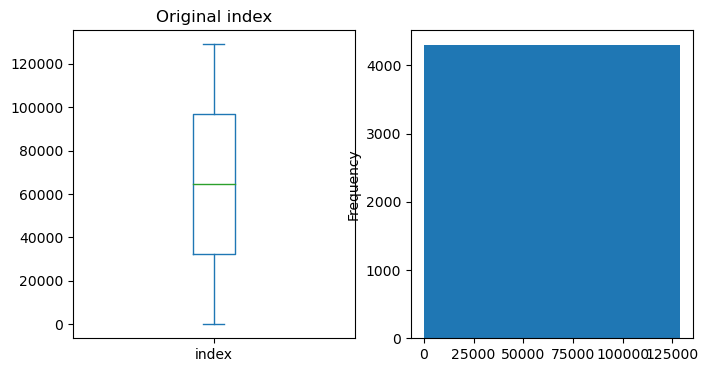


Column: Qty
IQR Range: [1.00, 1.00]
Found 13195 outliers:
        Qty
0         0
3         0
8         0
23        0
29        0
...     ...
128907    0
128908    0
128956    2
128958    0
128967    0

[13195 rows x 1 columns]


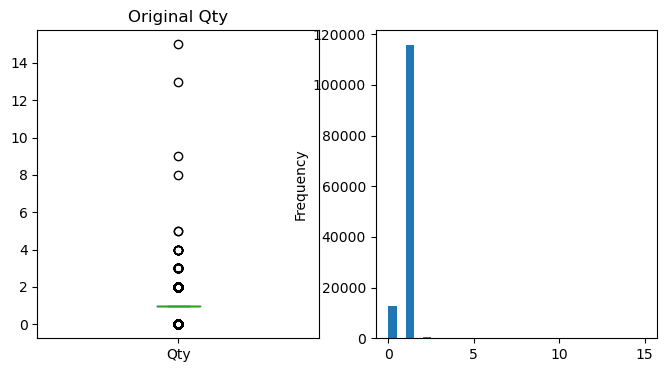


Column: Amount
IQR Range: [-59.50, 1296.50]
Found 3600 outliers:
        Amount
102     1338.0
146     1399.0
243     1338.0
265     2130.0
299     1463.0
...        ...
128811  1399.0
128846  1364.0
128873  1523.0
128911  1349.0
128957  1349.0

[3600 rows x 1 columns]


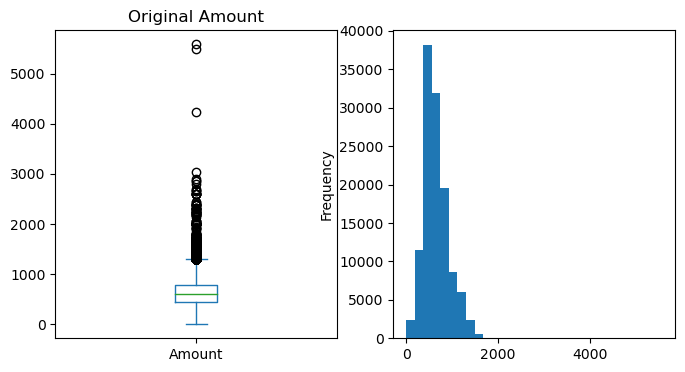


=== OUTLIER HANDLING ===

Trimmed Data (removed outliers):
         index             Order ID      Date                        Status  \
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
4            4  407-1069790-7240320  04-30-22                       Shipped   
5            5  404-1490984-4578765  04-30-22                       Shipped   
6            6  408-5748499-6859555  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shi

In [6]:
# phase 2 
#1. handling missing values
# Method 1: Deletion
def handle_missing_deletion(df):
    # Option 1: Drop rows with any missing values
    df_dropped = df.dropna()
    
    # Option 2: Drop columns with too many missing values (e.g., >50%)
    df_dropped_cols = df.dropna(axis=1, thresh=len(df)*0.5)
    
    return df_dropped, df_dropped_cols
print("\nAfter Deletion (rows):")
dropped_rows, _ = handle_missing_deletion(df)
print(dropped_rows)

# 2.data type conversion
from datetime import datetime

def convert_column_types(df, date_cols=None, numeric_cols=None, categorical_cols=None, bool_cols=None):
    """
    Convert DataFrame columns to specified data types with error handling
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    date_cols (list): Columns to convert to datetime
    numeric_cols (list): Columns to convert to numeric
    categorical_cols (list): Columns to convert to categorical
    bool_cols (list): Columns to convert to boolean
    Returns:
    pd.DataFrame: DataFrame with converted types
    dict: Conversion error report
    """
    error_report = {}
    df = df.copy()

# 1. Convert date columns
    if date_cols:
        for col in date_cols:
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                if df[col].isna().all():
                    error_report[col] = "Failed to convert any dates - check format"
            except Exception as e:
                error_report[col] = f"Date conversion failed: {str(e)}"
# 2. Convert numeric columns
    if numeric_cols:
        for col in numeric_cols:
            try:
                original_na_count = df[col].isna().sum()
                df[col] = pd.to_numeric(df[col], errors='coerce')
                new_na_count = df[col].isna().sum()
                
                if new_na_count > original_na_count:
                    error_report[col] = f"Numeric conversion created {new_na_count - original_na_count} new NA values"
            except Exception as e:
                error_report[col] = f"Numeric conversion failed: {str(e)}"
# 3. Convert categorical columns
    if categorical_cols:
        for col in categorical_cols:
            try:
                df[col] = df[col].astype('category')
                if len(df[col].cat.categories) > 50:
                    error_report[col] = f"High cardinality ({len(df[col].cat.categories)} categories)"
            except Exception as e:
                error_report[col] = f"Categorical conversion failed: {str(e)}"
 # 4. Convert boolean columns
    if bool_cols:
        bool_map = {'yes': True, 'no': False, 'true': True, 'false': False, '1': True, '0': False}
        for col in bool_cols:
            try:
                if df[col].dtype == 'object':
                    df[col] = df[col].str.lower().map(bool_map).astype('boolean')
                else:
                    df[col] = df[col].astype('boolean')
            except Exception as e:
                error_report[col] = f"Boolean conversion failed: {str(e)}"
    
    return df, error_report
    # Specify which columns to convert
converted_df, errors = convert_column_types(
    df,
    date_cols=['date_str'],
    numeric_cols=['price_str'],
    categorical_cols=['category'],
    bool_cols=['flag']
)
print("\nConverted DataFrame:")
print(converted_df.dtypes)
print("\nConversion Errors:")
for col, msg in errors.items():
    print(f"{col}: {msg}")

print("\nSample of converted data:")
print(converted_df.head())

# 3. Handling duplicates
# Identify duplicates based on all columns
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicates)

# Remove duplicates (keeping first occurrence)
clean_df = df.drop_duplicates()
print("\nDataFrame After Removing Duplicates:")
print(clean_df)
# Count total duplicates
print(f"Total duplicates found: {df.duplicated().sum()}")

# 4. addressing inconsistencies
numericals_cols = df.select_dtypes(include=[np.number])
print(numericals_cols)
catergorial_cols = df.select_dtypes(include=['category'])
print(catergorial_cols)
#Standardize postal codes (ensure string type and consistent format)
df['ship-postal-code'] = df['ship-postal-code'].astype(str).str.strip()
print("Standardized Data:")
print(df)

# 5 outlier handling
import matplotlib.pyplot as plt
# 1. Identify Outliers using IQR
print("=== OUTLIER DETECTION ===")
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    # Calculate bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"IQR Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Found {len(outliers)} outliers:")
    print(outliers[[col]])
 # Visualize distribution
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    df[col].plot(kind='box')
    plt.title(f'Original {col}')
    plt.subplot(1,2,2)
    df[col].plot(kind='hist', bins=30)
    plt.show()

# 2. Handle Outliers (Choose one method per column)
print("\n=== OUTLIER HANDLING ===")

# Method 1: Trimming (Remove outliers)
df_trimmed = df.copy()
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_trimmed = df_trimmed[(df_trimmed[col] >= (Q1 - 1.5*IQR)) & 
                           (df_trimmed[col] <= (Q3 + 1.5*IQR))]

# Method 2: Capping (Winsorization)
df_capped = df.copy()
for col in numerical_cols:
    lower = df[col].quantile(0.05)  # Can use IQR bounds instead
    upper = df[col].quantile(0.95)
    df_capped[col] = df_capped[col].clip(lower, upper)

# Method 3: Transformation (Log transform)
df_transformed = df.copy()
for col in numerical_cols:
    if df[col].min() > 0:  # Log requires positive values
        df_transformed[col] = np.log1p(df_transformed[col])

# Show results
print("\nTrimmed Data (removed outliers):")
print(df_trimmed)
print("\nCapped Data (winsorized outliers):")
print(df_capped)
print("\nTransformed Data (log scale):")
print(df_transformed)

C:\Users\Amal Omer\AppData\Local\Temp\ipykernel_1468\693668726.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])



Enhanced dataset saved to: D:\AMAL\project_enhanced.csv

New features added:
- Order_YearMonth
- Delivery_Speed
- Size_Category
- Bulk_Order
- Revenue_Per_Item
- Days_Since_Order
- Region

Sample of new features:
              Order ID Order_YearMonth Delivery_Speed Size_Category  \
0  405-8078784-5731545         2022-04           Slow         Small   
1  171-9198151-1101146         2022-04           Slow           NaN   
2  404-0687676-7273146         2022-04           Slow         Large   
3  403-9615377-8133951         2022-04           Slow         Large   
4  407-1069790-7240320         2022-04           Slow           NaN   

  Bulk_Order  Revenue_Per_Item  
0         No               inf  
1         No             406.0  
2         No             329.0  
3         No               inf  
4         No             574.0  

=== SUMMARY STATISTICS ===

Average Amount by Category:
                     mean  count          sum
Category                                     
Set         

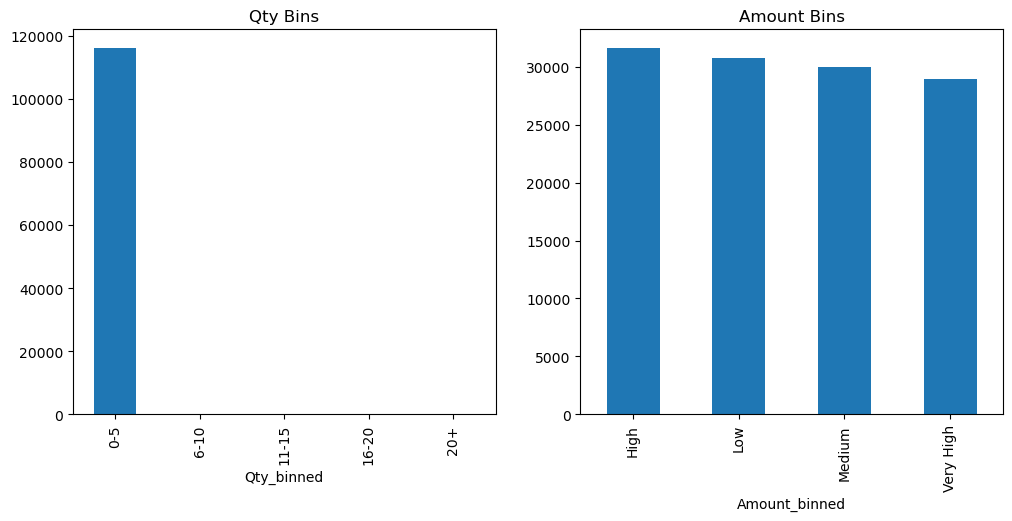


Processed data saved to 'processed_data.csv'


In [8]:
# phase 3
# 1. feature engineering
# 1. Create 'Order_YearMonth' for time-based analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Order_YearMonth'] = df['Date'].dt.to_period('M')
"""
Rationale: 
- Enables monthly trend analysis
- Helps identify seasonal patterns in sales
"""

# 2. Create 'Delivery_Speed' based on fulfilment and service level
df['Delivery_Speed'] = np.where(
    df['ship-service-level'].str.contains('Express'), 'Express', 
    np.where(df['fulfilled-by'] == 'Amazon', 'Standard', 'Slow')
)
"""
Rationale:
- Classifies delivery speed for customer experience analysis
- Helps correlate shipping speed with customer satisfaction
"""

# 3. Create 'Size_Category' grouping sizes
size_mapping = {
    'XS': 'Small', 'S': 'Small', 
    'M': 'Medium', 
    'L': 'Large', 'XL': 'Large', 'XXL': 'Large'
}
df['Size_Category'] = df['Size'].map(size_mapping)
"""
Rationale:
- Simplifies size analysis by grouping similar sizes
- Reduces cardinality for better visualization
"""

# 4. Create 'Bulk_Order' flag
df['Bulk_Order'] = df['Qty'].apply(lambda x: 'Yes' if x > 5 else 'No')
"""
Rationale:
- Identifies wholesale/bulk purchases important for B2B analysis
- Helps distinguish between retail and bulk buyers
"""

# 5. Create 'Revenue_Per_Item'
df['Revenue_Per_Item'] = df['Amount'] / df['Qty']
"""
Rationale:
- Normalizes revenue across different order quantities
- Helps identify high-value individual products
"""

# 6. Create 'Days_Since_Order' (if you have current date)
current_date = datetime.now()
df['Days_Since_Order'] = (current_date - df['Date']).dt.days
"""
Rationale:
- Enables recency analysis for customer engagement
- Useful for customer retention studies
"""

# 7. Create 'Region' from ship-state (example for US)
east_coast = ['NY', 'NJ', 'CT', 'MA', 'PA']
west_coast = ['CA', 'OR', 'WA']
df['Region'] = np.where(
    df['ship-state'].isin(east_coast), 'East Coast',
    np.where(df['ship-state'].isin(west_coast), 'West Coast', 'Other')
)
"""
Rationale:
- Groups states into meaningful regions for geographic analysis
- Reduces state-level granularity while preserving location insights
"""

# Save the enhanced dataset
output_path ="D:\AMAL\project.csv".replace('.csv', '_enhanced.csv')
df.to_csv(output_path, index=False)
print(f"\nEnhanced dataset saved to: {output_path}")
print("\nNew features added:")
print("- Order_YearMonth\n- Delivery_Speed\n- Size_Category")
print("- Bulk_Order\n- Revenue_Per_Item\n- Days_Since_Order\n- Region")
# Show sample of new features
print("\nSample of new features:")
print(df[['Order ID', 'Order_YearMonth', 'Delivery_Speed', 
          'Size_Category', 'Bulk_Order', 'Revenue_Per_Item']].head())
# 2 data summarisation and aggregation
print("\n=== SUMMARY STATISTICS ===")
# 1. Average amount by category
category_stats = df.groupby('Category')['Amount'].agg(['mean', 'count', 'sum'])
print("\nAverage Amount by Category:")
print(category_stats.sort_values('mean', ascending=False))
# 2. Average order amount by ship-state
state_stats = df.groupby('ship-state')['Amount'].mean()
print("\nAverage Order Amount by State:")
print(state_stats.sort_values(ascending=False).head(10))  # Top 10 states
# 3. Pivot table: Average amount by category and size
pivot_table = pd.pivot_table(df, 
                            values='Amount', 
                            index='Category', 
                            columns='Size',
                            aggfunc='mean')
print("\nPivot Table: Average Amount by Category and Size:")
print(pivot_table)
# 4. Fulfillment performance by courier status
fulfillment_stats = df.groupby(['Fulfilment', 'Courier Status'])['Order ID'].count()
print("\nFulfillment Performance by Courier Status:")
print(fulfillment_stats)
# Save results to new CSV files
category_stats.to_csv('category_stats.csv')
state_stats.to_csv('state_stats.csv')
pivot_table.to_csv('amount_by_category_size.csv')
print("\nAnalysis files saved successfully!")
 # 3. Data Standardization/Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def normalize_data(df):
    """Normalize numerical columns"""
    numerical_cols = ['Qty', 'Amount']  # Columns to normalize
    
    # Standardization (mean=0, std=1)
    scaler = StandardScaler()
    df[['Qty_std', 'Amount_std']] = scaler.fit_transform(df[['Qty', 'Amount']])
    
    # Normalization (0-1 range)
    minmax = MinMaxScaler()
    df[['Qty_norm', 'Amount_norm']] = minmax.fit_transform(df[['Qty', 'Amount']])
    
    print("\nAfter Standardization/Normalization:")
    print(df[['Qty', 'Qty_std', 'Qty_norm', 'Amount', 'Amount_std', 'Amount_norm']].head())
    return df

# When to Standardize/Normalize:
# - When features have different units/scales (e.g., Qty vs Amount)
# - Before distance-based algorithms (KNN, K-means)
# - Before regularization techniques
# - Before principal component analysis (PCA)

df = normalize_data(df)

# data binning
# 4. Data Binning
def bin_data(df):
    """Convert numerical to categorical via binning"""
    
    # Binning Qty (equal-width bins)
    df['Qty_binned'] = pd.cut(df['Qty'], 
                             bins=[0, 5, 10, 15, 20, 100], 
                             labels=['0-5', '6-10', '11-15', '16-20', '20+'])
    
    # Binning Amount (percentile-based bins)
    df['Amount_binned'] = pd.qcut(df['Amount'], 
                                q=4, 
                                labels=['Low', 'Medium', 'High', 'Very High'])
    
    print("\nAfter Binning:")
    print("Qty Bins Distribution:")
    print(df['Qty_binned'].value_counts())
    print("\nAmount Bins Distribution:")
    print(df['Amount_binned'].value_counts())
    
    # Visualize binning
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    df['Qty_binned'].value_counts().plot(kind='bar', ax=ax[0], title='Qty Bins')
    df['Amount_binned'].value_counts().plot(kind='bar', ax=ax[1], title='Amount Bins')
    plt.show()
    return df
# Bin Size Choices:
# - For Qty: Used business-relevant thresholds (common order quantities)
# - For Amount: Used quartiles (equal frequency bins)
# Alternative approaches:
# - Use domain knowledge for meaningful thresholds
# - Use statistical measures (standard deviations from mean)
# - Use clustering to find natural groupings

df = bin_data(df)

# Save processed data
df.to_csv('processed_data.csv', index=False)
print("\nProcessed data saved to 'processed_data.csv'")


In [10]:
#phase 4
from datetime import datetime
# Load the original CSV file
df = pd.read_csv("D:\AMAL\project.csv")  # Replace with your file path

# 1. Standardize column names (remove spaces, make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Clean date format (assuming multiple date formats might exist)
def clean_date(date_str):
    if pd.isna(date_str):
        return np.nan
    for fmt in ('%Y-%m-%d', '%d-%m-%Y', '%m/%d/%Y', '%Y/%m/%d', '%d-%b-%y'):
        try:
            return datetime.strptime(str(date_str), fmt).strftime('%Y-%m-%d')
        except ValueError:
            continue
    return date_str  # return original if no format matches

df['date'] = df['date'].apply(clean_date)

# 3. Clean categorical columns (standardize text)
categorical_cols = ['status', 'fulfilment', 'sales_channel', 'ship-service-level', 
                   'style', 'category', 'courier_status', 'currency', 'ship-country', 
                   'fulfilled-by']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.upper()

# 4. Clean numerical columns (handle missing values)
numerical_cols = ['qty', 'amount']
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(0)  # Replace NA with 0 (or use median() if preferred)

# 5. Clean text columns (standardize case and spacing)
text_cols = ['order_id', 'sku', 'asin', 'ship-city', 'ship-state', 'promotion-ids']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# 6. Handle boolean columns (standardize to True/False)
if 'b2b' in df.columns:
    df['b2b'] = df['b2b'].astype(str).str.upper().replace({
        'TRUE': True, 'FALSE': False, 'YES': True, 'NO': False, '1': True, '0': False
    })

# 7. Reorder columns to match original structure
column_order = [
    'index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
    'ship-service-level', 'style', 'sku', 'category', 'size', 'asin',
    'courier_status', 'qty', 'currency', 'amount', 'ship-city', 'ship-state',
    'ship-postal-code', 'ship-country', 'promotion-ids', 'b2b', 'fulfilled-by'
]

# Keep only columns that exist in both the DataFrame and our desired order
final_columns = [col for col in column_order if col in df.columns]
df = df[final_columns]

# 8. Save cleaned data to new CSV file
df.to_csv('cleaned_orders_data.csv', index=False)

print("Data cleaning complete. Saved to 'cleaned_orders_data.csv'")
print(f"Original shape: {df.shape[0]} rows, {df.shape[1]} columns")

C:\Users\Amal Omer\AppData\Local\Temp\ipykernel_1468\1952616710.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\AMAL\project.csv")  # Replace with your file path


Data cleaning complete. Saved to 'cleaned_orders_data.csv'
Original shape: 128975 rows, 23 columns
